# Task 8: Random Forest vs Decision Tree 
- Train a RandomForestClassifier on the same dataset used for Task 5. 
- Compare accuracy, precision, and recall with the standalone decision tree. 
- Plot feature importances.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [10]:
data = sns.load_dataset("titanic")

# filled missing values in age as well as embarked
data.fillna({'age' : data['age'].median()}, inplace=True)
data.fillna({'embarked': data['embarked'].mode()[0]}, inplace=True)


# changing into numbers
data['sex'] = data['sex'].map({'male':0,'female':1})
data["embarked"] = data["embarked"].map({"S": 0, "C": 1, "Q": 2})

X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = data['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Forest

In [13]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict(X_test)

class_dt = classification_report(y_test,y_pred_dt)
print(class_dt)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Random Forest

In [14]:
model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)

class_rf = classification_report(y_test,y_pred_rf)
print(class_rf)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



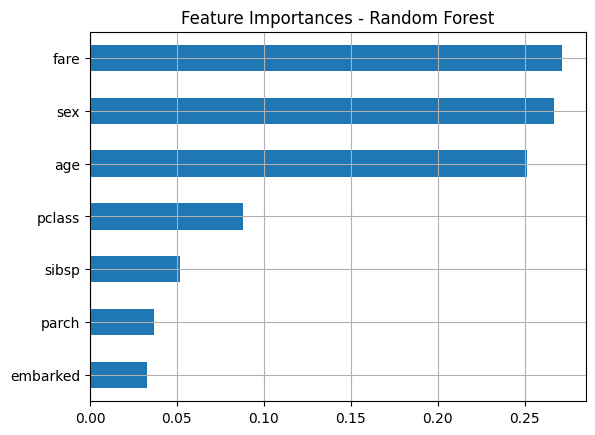

In [23]:
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
# feature importance ko sort krr diya then barh means bar graph ke form mei dikha diya 
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances - Random Forest")
plt.grid()
plt.show()


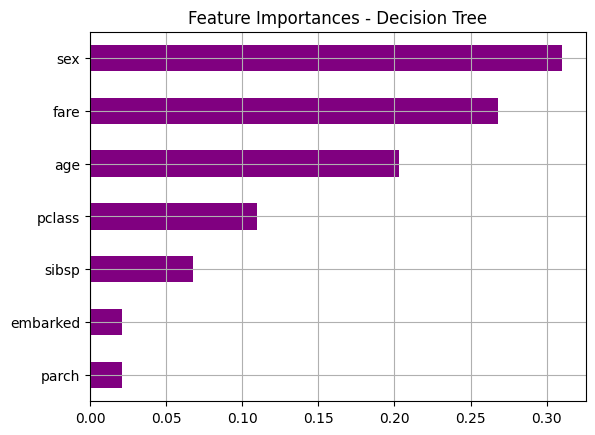

In [28]:
feature_importances = pd.Series(model_dt.feature_importances_, index=X_train.columns)
# feature importance ko sort krr diya then barh means bar graph ke form mei dikha diya 
feature_importances.sort_values().plot(kind='barh' , color='purple')
plt.title("Feature Importances - Decision Tree")
plt.grid()


We can see feature_importance graph of both are different 

- in Decision Tree highest_importance was given to sex while in randomForest highest_importance was given to fare